## Vanilla Neural Network

### Importing libs

In [38]:
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import RMSprop,SGD,Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2
from keras_preprocessing.image import img_to_array
import tensorflow as tf
from keras.models import load_model

### load datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

### preprocessing input data

In [5]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


###  preprocessing output data

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [8]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### initializing the parameters

In [29]:
NB_EPOCH = 30  # epoch -> iterations -> 20 to 200
BATCH_SIZE = 128 # multiples of 64
VERBOSE = 1 
NB_CLASSES = 10 # output classes

OPTIMIZER = RMSprop()
N_HIDDEN = 128  # multiples of 64
VALIDATION_SPLIT = 0.1

DROPOUT = 0.1
graph = tf.get_default_graph()

### model defining

In [10]:
# # simple architecture
# model = Sequential()

# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# model.add(Activation('relu'))


# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# model.summary()

In [11]:
# # with hidden layers 
# model = Sequential()
# model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
# model.add(Activation('relu'))
# model.add(Dense(N_HIDDEN))
# model.add(Activation('relu'))
# model.add(Dense(NB_CLASSES))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# model.summary()

In [12]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

### training

In [13]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 59us/step - loss: 0.3548 - acc: 0.8940 - val_loss: 0.1321 - val_acc: 0.9613
Epoch 2/30
54000/54000 [==============================] - 3s 52us/step - loss: 0.1543 - acc: 0.9535 - val_loss: 0.1065 - val_acc: 0.9653
Epoch 3/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.1129 - acc: 0.9658 - val_loss: 0.0853 - val_acc: 0.9747
Epoch 4/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.0893 - acc: 0.9728 - val_loss: 0.0792 - val_acc: 0.9763
Epoch 5/30
54000/54000 [==============================] - 3s 53us/step - loss: 0.0760 - acc: 0.9776 - val_loss: 0.0730 - val_acc: 0.9770
Epoch 6/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.0660 - acc: 0.9795 - val_loss: 0.0710 - val_acc: 0.9787
Epoch 7/30
54000/54000 [==============================] - 3s 54us/step - loss: 0.

### testing

In [14]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 46us/step
Test accuracy: 0.9812


### results visualization

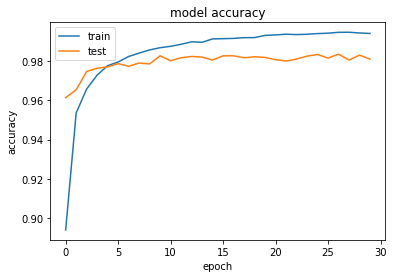

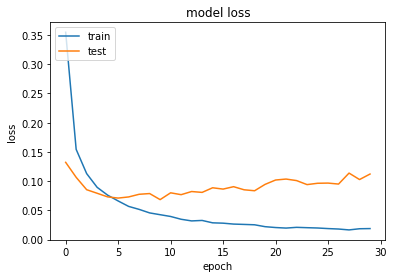

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### saving model

In [16]:
# method-1
model_json = model.to_json()
open('Maize-DL_architecture.json', 'w').write(model_json)
model.save_weights('Maize-DL_weights.h5', overwrite=True)

In [17]:
# method-2
model.save("./Deep_Learning/DL-Maize.model")

### Real-time prediction

In [18]:
img = cv2.imread("./Deep_Learning/zeros.png",0)

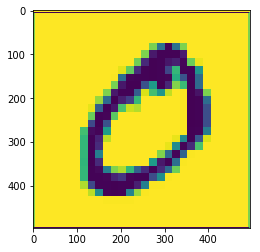

In [19]:
plt.imshow(img)
plt.show()

In [20]:
img = cv2.resize(img,(28,28))

In [21]:
img = img_to_array(img)

In [22]:
img = np.expand_dims(img,axis=0)

In [23]:
img=img.reshape(1,784)

In [24]:
img.shape

(1, 784)

In [39]:
LoadedModel = load_model("./Deep_Learning/DL-Maize.model")

In [40]:
LoadedModel.predict([img])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
LoadedModel.predict_classes([img])[0]

2

In [42]:
LoadedModel.predict_proba([img])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Simple RNN

### importing libs

In [1]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential

### loading datasets

In [2]:
fin = open("./Deep_Learning/11.txt", 'rb')
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()

text = " ".join(lines)

### character extraction and vectorization

In [5]:
chars = set(text)
nb_chars = len(chars)

char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))


### separating input and output

In [9]:
SEQLEN = 10
STEP = 1
input_chars = []
label_chars = []

for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


In [10]:
input_chars[:5]

['project gu', 'roject gut', 'oject gute', 'ject guten', 'ect gutenb']

In [11]:
label_chars[:5]

['t', 'e', 'n', 'b', 'e']

### creating 3D vector matrix for input

In [14]:
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)#5000 x 10 x 55
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)



In [20]:
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
        y[i, char2index[label_chars[i]]] = 1


### model defining

In [24]:
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 20
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,input_shape=(SEQLEN, nb_chars),unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               23552     
_________________________________________________________________
dense_1 (Dense)              (None, 55)                7095      
_________________________________________________________________
activation_1 (Activation)    (None, 55)                0         
Total params: 30,647
Trainable params: 30,647
Non-trainable params: 0
_________________________________________________________________


### training

In [25]:
model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_ITERATIONS)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
158773/158773 [==============================] - 8s 48us/step - loss: 2.3345
Epoch 2/20
158773/158773 [==============================] - 8s 49us/step - loss: 2.0459
Epoch 3/20
158773/158773 [==============================] - 7s 44us/step - loss: 1.9422
Epoch 4/20
158773/158773 [==============================] - 7s 42us/step - loss: 1.8613
Epoch 5/20
158773/158773 [==============================] - 7s 42us/step - loss: 1.7949
Epoch 6/20
158773/158773 [==============================] - 6s 40us/step - loss: 1.7408
Epoch 7/20
158773/158773 [==============================] - 6s 40us/step - loss: 1.6969
Epoch 8/20
158773/158773 [==============================] - 6s 40us/step - loss: 1.6582
Epoch 9/20
158773/158773 [==============================] - 6s 40us/step - loss: 1.6264
Epoch 10/20
158773/158773 [==============================] - 6s 39us/step - loss: 1.5977
Epoch 11/20
158773/158773 [==============================] - 6s 39us/st

### prediction

In [30]:
test_chars = "what i am "
print("Generating from seed: %s" % (test_chars))
output = test_chars


Generating from seed: what i am 


In [31]:
for i in range(NUM_PREDS_PER_EPOCH):
    Xtest = np.zeros((1, SEQLEN, nb_chars))
    for i, ch in enumerate(test_chars):
        Xtest[0, i, char2index[ch]] = 1
    pred = model.predict(Xtest, verbose=0)[0]
    ypred = index2char[np.argmax(pred)]
    output += ypred
    # move forward with test_chars + ypred
    test_chars = test_chars[1:] + ypred


In [32]:
output

'what i am the duchess and the project gutenberg-tm license the duchess and the project gutenberg-tm license th'

## LSTM

### importing libs

In [1]:
import collections

import matplotlib.pyplot as plt
import nltk
import numpy as np
from keras.layers.core import Activation, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [3]:
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0

In [4]:
ftrain = open("./Deep_Learning/training.txt", "r")

for line in ftrain:
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()

In [5]:
maxlen

42

In [7]:
len(word_freqs)

2328

In [8]:
MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 40

In [9]:
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

In [27]:
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, ))
i = 0

ftrain = open("./Deep_Learning/training.txt", "r")

for i,line in enumerate(ftrain):
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i += 1
ftrain.close()


In [28]:
X[5168]

[36,
 413,
 427,
 25,
 35,
 599,
 25,
 2001,
 3,
 2,
 521,
 25,
 587,
 18,
 39,
 348,
 8,
 14,
 756,
 3,
 1,
 47,
 1,
 1,
 1,
 15]

In [29]:
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)

In [30]:
X[15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  59,  10,   9,
       387], dtype=int32)

In [31]:
X.shape

(7086, 40)

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
model.add(Dropout(0.2))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 128)           256256    
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 305,729
Trainable params: 305,729
Non-trainable params: 0
_______________

In [34]:
history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

Instructions for updating:
Use tf.cast instead.
Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 9s 2ms/step - loss: 0.2238 - acc: 0.9063 - val_loss: 0.0643 - val_acc: 0.9767
Epoch 2/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0386 - val_acc: 0.9887
Epoch 3/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0097 - acc: 0.9975 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 4/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0053 - acc: 0.9989 - val_loss: 0.0548 - val_acc: 0.9873
Epoch 5/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0035 - acc: 0.9995 - val_loss: 0.0435 - val_acc: 0.9901
Epoch 6/10
5668/5668 [==============================] - 6s 1ms/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0602 - val_acc: 0.9901
Epoch 7/10
5668/5668 [==============================] - 7s 1ms/step - loss: 0.0020 - acc: 0.9995 - v

In [36]:
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
print("Test score: %.3f, accuracy: %.3f" % (score, acc))

1418/1418 [==============================] - 0s 217us/step
Test score: 0.051, accuracy: 0.989


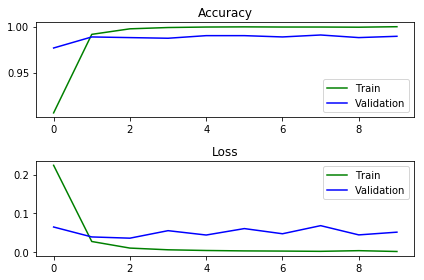

In [37]:
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [38]:
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,40)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0].tolist() if x != 0])
    print("Predicted\tActual\t\tsentence")
    print("%.0f\t\t%d\t\t%s" % (ypred, ylabel, sent))

Predicted	Actual		sentence
1		1		the da vinci code was absolutely awesome !
Predicted	Actual		sentence
1		1		the da vinci code is awesome ! !
Predicted	Actual		sentence
0		0		so now , i 'm going to watch some tv , then bullshit a i fucking hate harry potter costume for the monthly meeting tonight .
Predicted	Actual		sentence
0		0		brokeback mountain is fucking horrible..
Predicted	Actual		sentence
1		1		the da vinci code was absolutely awesome !
